# **INSPECCIÓN PRINCIPAL BASE DE DATOS**
Cybersecurity Intrusion Detection Dataset, es una base de datos que recopila información relacionada principalmente a los patrones de comportamiento del usuario y el tráfico de red, tal como lo describe el autor. El Dataset cuenta con 11 columnas con 9537 registros (filas), distribuidos de la siguiente manera:

### **Variables categóricas:**
1.	**Encryption_used:**
Indica el tipo de encriptación aplicado en la conexión. Sus categorías son:
-	AES: Estándar de cifrado avanzado, fuerte y ampliamente utilizado.
-	DES: Estándar antiguo de cifrado de datos.
-	Ninguna encriptación: No se usó ningún método de encriptación.
2.	**Protocol_type:**
Representa el protocolo utilizado en la comunicación:
-TCP (Protocolo de Control de Transmisión).
-UDP (Protocolo de Datagramas del Usuario).
-ICMP (Protocolo de Mensajes de Control de Internet, usado en diagnósticos).
3. **Browser_type:** Tipo de navegador utilizado por el usuario.
4.	**Unusual_time_access:** Con registro binario que indica si inicio sesión fuera del horario normal.
5. **Attack_detected:** Variable con clasificación binaria que determina si recibió un ataque o no.
### **Variables númericas:**
-	**Asociadas al tráfico de red:**
 6.	**Network_packet_size:** Tamaño de paquetes de bytes que oscila entre 64 y 1500 bytes.
-	**Asociadas al comportamiento del usuario:**
 7.	**Login_attempts:** Intentos de inicio de sesión típicos de los usuarios
 8.	**Session_duration:** Tiempo de sesión iniciada.
 9.	**Failed_logins:** Número de inicios de sesión fallidos.
 10.	**Ip_reputation_score:** Mide y clasifica la confiabilidad de la dirección IP.
### **Otras**
11. **Session_id:** Número de ID de la sesión del usuario.
### **Nuevas variables**
12. **Minutos_sesion:** Cantidad de minutos de sesión iniciada relacionado con **Sesion_duration**.
13. **accesos_fallidos:** Mapeo especial creado a partir del **login_attempts**.
14. **paquetes_bytes:** Mapeo especial creado a partir del **network_packet_size**.


## **Vista previa del dataset**

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr
import kagglehub
url = "https://raw.githubusercontent.com/jdrodriguez03/proyecto-final-progra-2/main/data/cybersecurity_intrusion_data.csv"
df = pd.read_csv(url)
df = pd.read_csv(url, encoding="utf-8")
print(df.head())

  session_id  network_packet_size protocol_type  login_attempts  \
0  SID_00001                  599           TCP               4   
1  SID_00002                  472           TCP               3   
2  SID_00003                  629           TCP               3   
3  SID_00004                  804           UDP               4   
4  SID_00005                  453           TCP               5   

   session_duration encryption_used  ip_reputation_score  failed_logins  \
0        492.983263             DES             0.606818              1   
1       1557.996461             DES             0.301569              0   
2         75.044262             DES             0.739164              2   
3        601.248835             DES             0.123267              0   
4        532.540888             AES             0.054874              1   

  browser_type  unusual_time_access  attack_detected  
0         Edge                    0                1  
1      Firefox                    0 

### **Información Géneral**
- Número de filas, columnas con su nombre.
- Clasificación de tipo de datos: Object, float, int, etc.
- Valores no nulos.
- Cantidad de registros por columna.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


### **Inspección y tratamiento de datos faltantes**
Se ejecuta el código para poder visualizar los datos faltantes:
1. Tabla pequeña del total de valores faltantes normal y porcentual.
2. Mapa de valores faltantes, facilíta la visualización.
3. Imputación de los datos faltantes.
4. Nuevo mapa.

In [4]:
"""
Tabla normal de valores faltantes
"""
df.isnull().sum()

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

In [5]:
"""
Tabla de con porcentajes de valores faltantes
"""
(df.isnull().sum() / len(df)) * 100

session_id              0.000000
network_packet_size     0.000000
protocol_type           0.000000
login_attempts          0.000000
session_duration        0.000000
encryption_used        20.614449
ip_reputation_score     0.000000
failed_logins           0.000000
browser_type            0.000000
unusual_time_access     0.000000
attack_detected         0.000000
dtype: float64

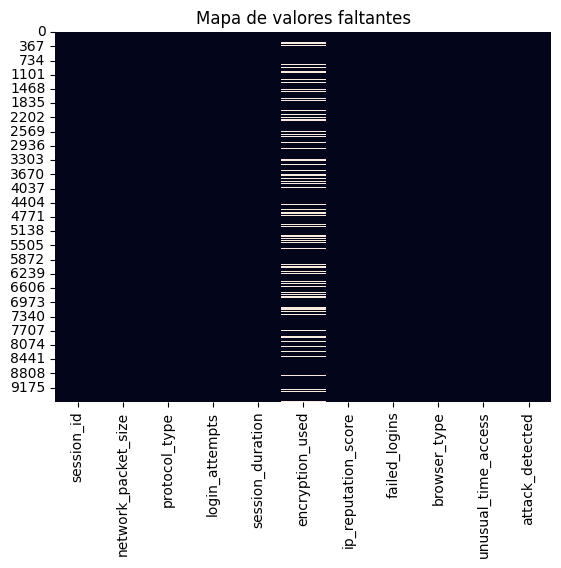

In [6]:
"""
 Mapa de valores faltantes
"""
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores faltantes")
plt.show()

De acuerdo con el mapa, hay 1.966 valores faltantes en encryption_used. Sin embargo, según la información proporcionada en Kaggle, los datos nulos representan comunicación no cifrada y, durante la imputación, se les asignó el valor "Ninguna_encript".

In [7]:
"""
Imputación
"""
valor="Ninguna_encript"
df['encryption_used']=df['encryption_used'].fillna(valor)

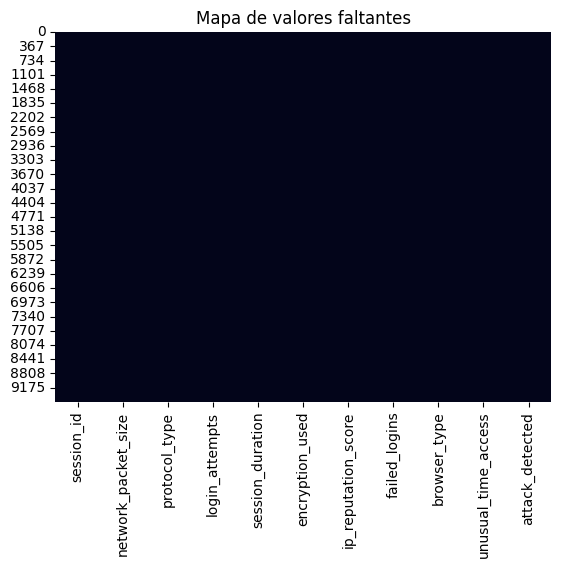

In [8]:
"""
Nueva visualización
"""
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores faltantes")
plt.show()


### **MAPEO DEL DATASET**
Durante el proceso de limpieza del dataset, se realizó un análisis de las variables categóricas encryption_used, protocol_type y browser_type mediante la función value_counts, con el fin de identificar posibles inconsistencias en los textos y evitar la presencia de categorías repetidas que pudieran alterar el análisis de los datos.

In [9]:
"""
Primer análisis para mapeo
"""
df["encryption_used"].value_counts()

encryption_used
AES                4706
DES                2865
Ninguna_encript    1966
Name: count, dtype: int64

In [10]:
"""
Segundo análisis para mapeo
"""
df["protocol_type"].value_counts()

protocol_type
TCP     6624
UDP     2406
ICMP     507
Name: count, dtype: int64

In [11]:
"""
Tercer análisis para mapeo
"""
df["browser_type"].value_counts()

browser_type
Chrome     5137
Firefox    1944
Edge       1469
Unknown     502
Safari      485
Name: count, dtype: int64

### **Datos Duplicados**
Búsqueda de registros duplicados en el dataset.

In [12]:
df[df.duplicated(keep=False)]

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected


### **Identificacion de outliers**

## Descripción del Proceso Completo de Análisis, Detección de Outliers y Filtración de Datos

A continuación se presenta un desglose estructurado de las tareas realizadas, desde la detección de valores anómalos hasta la depuración y clasificación final del dataset.

---

### 1. Identificación de Outliers en Variables Críticas

Se analizan múltiples variables relevantes para la seguridad informática con el fin de detectar comportamientos anómalos.  
Para cada variable se aplican los siguientes pasos:

#### 1.1 Visualización con Boxplot
Se genera un boxplot que permite observar la distribución de los datos y localizar posibles valores extremos.

#### 1.2 Cálculo de Cuartiles e IQR
- Se obtienen los percentiles 25 (Q1) y 75 (Q3).  
- Con estos valores se calcula el rango intercuartílico (**IQR = Q3 − Q1**).

#### 1.3 Definición de Límites Inferior y Superior
Se establecen los límites matemáticos para determinar outliers:  
- **Límite inferior:** Q1 − 1.5·IQR  
- **Límite superior:** Q3 + 1.5·IQR

#### 1.4 Conteo de Outliers Altos y Bajos
Se contabilizan los registros que se encuentran por fuera de los límites establecidos.

#### 1.5 Interpretación Técnica de Resultados
Para cada variable se analiza el impacto de los outliers detectados y su posible relación con comportamiento anómalo o malicioso.

---

### 2. Análisis del Origen de los Outliers

Los registros identificados como outliers se comparan con la columna que indica si existió un ataque.  
El propósito es determinar:

- Si los valores extremos realmente representan actividad maliciosa.  
- Si corresponden a variaciones normales del sistema (outliers legítimos).  

Este análisis permite detectar **falsos positivos**, es decir, valores atípicos que no están asociados a ciberataques.

---

### 3. Eliminación Selectiva de Outliers No Relevantes

Se eliminan del dataset aquellos outliers que no muestran relación con actividad maliciosa.  
Este proceso garantiza que:

- El análisis posterior no sea afectado por datos irrelevantes.  
- La información restante represente más fielmente el comportamiento real del sistema.  

Finalmente, se verifica que los valores extremos no deseados hayan sido correctamente removidos, dejando un dataset limpio y confiable.


---

### 1 - Network_packet_size

Información: network_packet_size 
 Q1: 365.0, Q3: 635.0, limite inferior: -40.0, limite superior: 1040.0 
 High Outliers: 37, Low Outliers:0


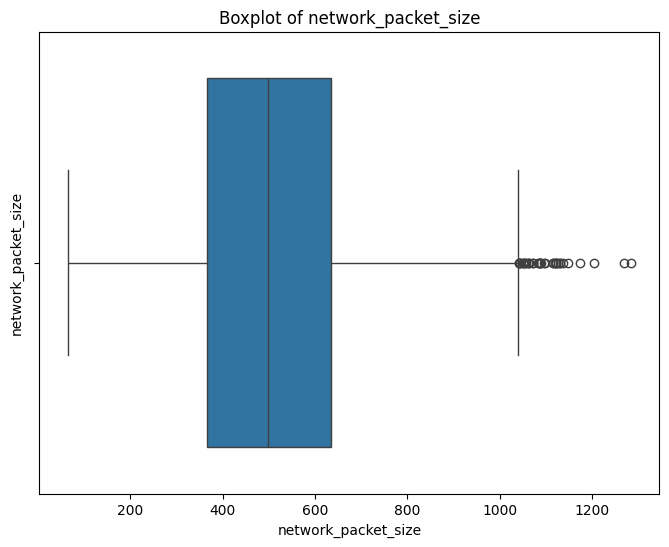

In [13]:
#grafico - Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['network_packet_size'])
plt.title('Boxplot of network_packet_size')
plt.ylabel('network_packet_size')

#Cuartiles
Q1__network_packet_size = df["network_packet_size"].quantile(0.25)
Q3__network_packet_size = df["network_packet_size"].quantile(0.75)

#IQR y limites
rango_IQR =iqr(df["network_packet_size"])
lim_inf__network_packet_size = Q1__network_packet_size - 1.5*rango_IQR
lim_sup__network_packet_size =Q3__network_packet_size + 1.5*rango_IQR
cant_lim_inf__network_packet_size =  df[df['network_packet_size'] > lim_sup__network_packet_size].shape[0]
cant_lim_sup__network_packet_size = df[df['network_packet_size'] < lim_inf__network_packet_size].shape[0]

print(f"Información: network_packet_size \n Q1: {Q1__network_packet_size}, Q3: {Q3__network_packet_size}, limite inferior: {lim_inf__network_packet_size}, limite superior: {lim_sup__network_packet_size} \n High Outliers: {cant_lim_inf__network_packet_size}, Low Outliers:{cant_lim_sup__network_packet_size}")


#### Interpretación
Valores extremadamente grandes en paquetes ( > 635.0) de red pueden indicar:
1. Transferencias inusuales.
2. Posibles ataques de denegación de servaicio.
3. Actividades masivas de subida/bajada de datos.

### 2. login_attempts

Informacion: login_attempts 
 Q1: 3.0, Q3: 5.0, limite inferior: 0.0, limite superior: 8.0 
 High Outliers: 206, Low Outliers:0


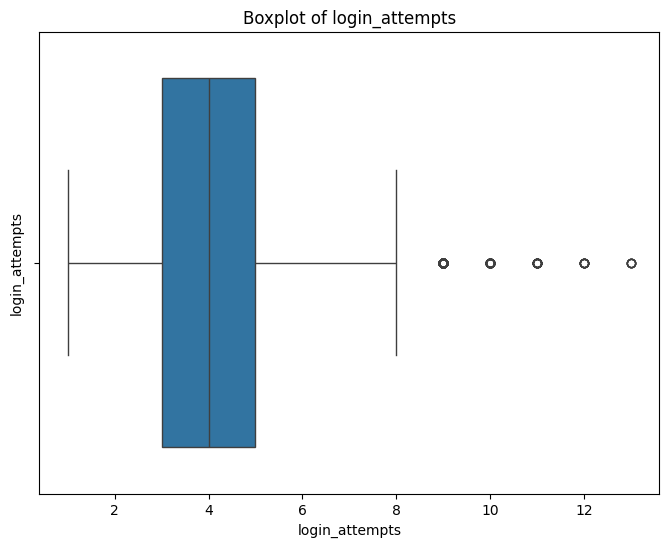

In [14]:
#grafico - Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['login_attempts'])
plt.title('Boxplot of login_attempts')
plt.ylabel('login_attempts')

#Cuartiles
Q1__login_attempts = df["login_attempts"].quantile(0.25)
Q3__login_attempts = df["login_attempts"].quantile(0.75)

#IQR y limites
rango_IQR =iqr(df["login_attempts"])
lim_inf__login_attempts = Q1__login_attempts - 1.5*rango_IQR
lim_sup__login_attempts =Q3__login_attempts + 1.5*rango_IQR
cant_lim_inf__login_attempts =  df[df['login_attempts'] > lim_sup__login_attempts].shape[0]
cant_lim_sup__login_attempts = df[df['login_attempts'] < lim_inf__login_attempts].shape[0]

print(f"Informacion: login_attempts \n Q1: {Q1__login_attempts}, Q3: {Q3__login_attempts}, limite inferior: {lim_inf__login_attempts}, limite superior: {lim_sup__login_attempts} \n High Outliers: {cant_lim_inf__login_attempts}, Low Outliers:{cant_lim_sup__login_attempts}")
#Cuales son los outliers?
    #df[df['login_attempts'] > lim_sup]
    #df[df['login_attempts'] < lim_inf]

#### Interpretacion
1. No hay actividad anormal en intentos de login.
2. No hay evidencia de ataques tipo "brute force".

### 3. sesion_duration

Informacion: session_duration 
 Q1: 231.95300642419463, Q3: 1105.3806022240433, limite inferior: -1078.1883872755782, limite superior: 2415.521995923816 
 High Outliers: 418, Low Outliers:0


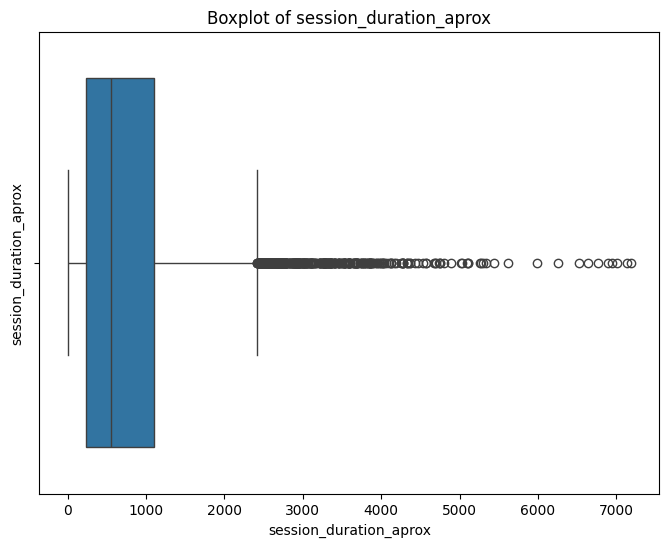

In [15]:
#Creacion de columna aproximada de session_duration
df["session_duration_aprox"] = df["session_duration"].round()
#print(df["session_duration_aprox"].head(10))

#grafico - Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['session_duration_aprox'])
plt.title('Boxplot of session_duration_aprox')
plt.ylabel('session_duration_aprox')

#Cuartiles
Q1__sesion_duration = df["session_duration"].quantile(0.25)
Q3__sesion_duration = df["session_duration"].quantile(0.75)

#IQR y limites
rango_IQR =iqr(df["session_duration"])
lim_inf__sesion_duration = Q1__sesion_duration - 1.5*rango_IQR
lim_sup__sesion_duration =Q3__sesion_duration + 1.5*rango_IQR
cant_lim_inf__sesion_duration =  df[df['session_duration'] > lim_sup__sesion_duration].shape[0]
cant_lim_sup__sesion_duration = df[df['session_duration'] < lim_inf__sesion_duration].shape[0]

print(f"Informacion: session_duration \n Q1: {Q1__sesion_duration }, Q3: {Q3__sesion_duration}, limite inferior: {lim_inf__sesion_duration}, limite superior: {lim_sup__sesion_duration} \n High Outliers: {cant_lim_inf__sesion_duration}, Low Outliers:{cant_lim_sup__sesion_duration}")
#Cuales son los outliers?
    #df[df['session_duration'] > lim_sup]
    #df[df['session_duration'] < lim_inf]

#### Interpretación

Sesiones anormalmente largas pueden:
1. Indicar secuestro de sesión (session hijacking)
2. Procesos automatizados
3. Bots conectados permanentemente
4. Actividad continua de extracción o inyección de datos


### 4. ip_reputation_score

Informacion: ip_reputation_score 
 Q1: 0.191946488079701, Q3: 0.4533878446573279, limite inferior: -0.20021554678673936, limite superior: 0.8455498795237683 
 High Outliers: 21, Low Outliers:0


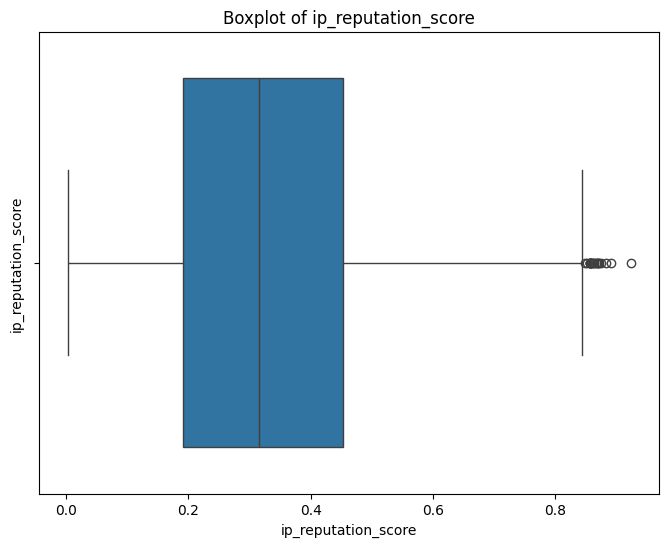

In [16]:
#grafico - Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['ip_reputation_score'])
plt.title('Boxplot of ip_reputation_score')
plt.ylabel('ip_reputation_score')

#Cuartiles
Q1__ip_reputation_score = df["ip_reputation_score"].quantile(0.25)
Q3__ip_reputation_score = df["ip_reputation_score"].quantile(0.75)

#IQR y limites
rango_IQR =iqr(df["ip_reputation_score"])
lim_inf__ip_reputation_score = Q1__ip_reputation_score - 1.5*rango_IQR
lim_sup__ip_reputation_score =Q3__ip_reputation_score + 1.5*rango_IQR
cant_lim_inf__ip_reputation_score =  df[df['ip_reputation_score'] > lim_sup__ip_reputation_score].shape[0]
cant_lim_sup__ip_reputation_score = df[df['ip_reputation_score'] < lim_inf__ip_reputation_score].shape[0]

print(f"Informacion: ip_reputation_score \n Q1: {Q1__ip_reputation_score }, Q3: {Q3__ip_reputation_score}, limite inferior: {lim_inf__ip_reputation_score}, limite superior: {lim_sup__ip_reputation_score} \n High Outliers: {cant_lim_inf__ip_reputation_score}, Low Outliers:{cant_lim_sup__ip_reputation_score}")
#Cuales son los outliers?
    #df[df['ip_reputation_score'] > lim_sup]
    #df[df['ip_reputation_score'] < lim_inf]

#### Interpretación
Outliers altos pueden indicar:
1. IPs muy sospechosas
2. Bots conocidos
3. Redes comprometidas

### 5. failed_logins

Informacion: failed_logins 
 Q1: 1.0, Q3: 2.0, limite inferior: -0.5, limite superior: 3.5 
 High Outliers: 323, Low Outliers:0


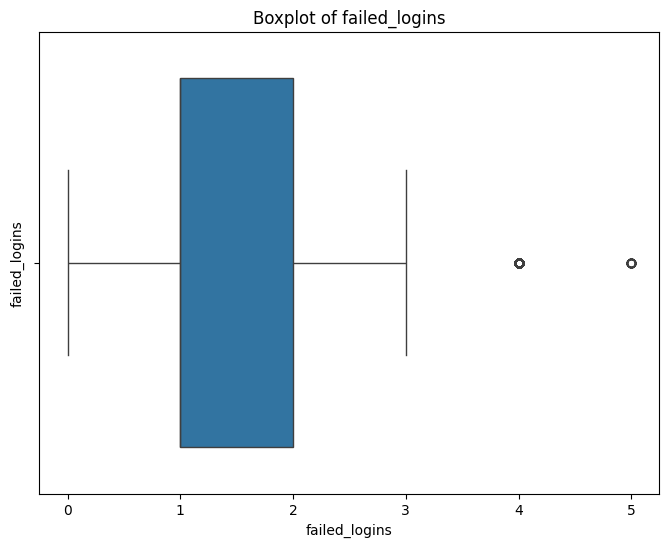

In [17]:
#grafico - Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['failed_logins'])
plt.title('Boxplot of failed_logins')
plt.ylabel('failed_logins')

#Cuartiles
Q1__failed_logins = df["failed_logins"].quantile(0.25)
Q3__failed_logins = df["failed_logins"].quantile(0.75)

#IQR y limites
rango_IQR =iqr(df["failed_logins"])
lim_inf__failed_logins = Q1__failed_logins - 1.5*rango_IQR
lim_sup__failed_logins =Q3__failed_logins + 1.5*rango_IQR
cant_lim_inf__failed_logins =  df[df['failed_logins'] > lim_sup__failed_logins].shape[0]
cant_lim_sup__failed_logins = df[df['failed_logins'] < lim_inf__failed_logins].shape[0]

print(f"Informacion: failed_logins \n Q1: {Q1__failed_logins }, Q3: {Q3__failed_logins}, limite inferior: {lim_inf__failed_logins}, limite superior: {lim_sup__failed_logins} \n High Outliers: {cant_lim_inf__failed_logins}, Low Outliers:{cant_lim_sup__failed_logins}")
#Cuales son los outliers?
    #df[df['failed_logins'] > lim_sup]
    #df[df['failed_logins'] < lim_inf]

#### Interpretación
Evidencia un número significativo de sesiones con intentos de acceso inusualmente altos. 

1. Ataques de fuerza bruta.

2. Credenciales equivocadas repetidas.

3. Actividad automatizada sospechosa.

### **Filtración y Segmentación del Dataset**

Una vez depurado el dataset, se aplican múltiples filtros para clasificar los registros y analizar comportamientos sospechosos, tráfico normal y ataques confirmados.

---

### **6. Filtración de Datos**

#### **6.1 Usuarios con Comportamiento Altamente Sospechoso**
Se identifican sesiones donde coinciden dos factores críticos al mismo tiempo, como:
- Reputación de IP muy baja.
- Alto número de intentos fallidos de acceso.

#### **6.2 Sesiones Muy Sospechosas (Multicriterio)**
Se construye un subconjunto con todas las sesiones que cumplen **al menos una condición grave**, tales como:
- Duración anormalmente larga.  
- Tamaño de paquetes excesivo.  
- Repetidos fallos de autenticación.  
- Mala reputación de IP.

#### **6.3 Sesiones Marcadas Como Ataque**
Se extraen todos los registros donde el dataset indica explícitamente `attack_detected = 1`.  
Esto permite contrastar patrones reales de ataque frente a los outliers detectados.

#### **6.4 Sesiones Limpias**
Se separan todas las sesiones completamente normales (`attack_detected = 0`) con el fin de compararlas frente al tráfico malicioso.

---

### **7. Segmentación por Características Específicas**

Una vez identificados ataques, outliers y sesiones sospechosas, se organiza el dataset en distintos subconjuntos basados en atributos particulares.

#### **7.1 Categoría del Navegador**
- `df_Firefox`  
- `df_Chrome`  
- `df_Edge`  
- `df_Safari`  

Permite analizar si ciertos navegadores están asociados a mayor actividad maliciosa o inusual.

#### **7.2 Tipo de Protocolo Utilizado**
- `df_TCP`  
- `df_UPD`  
- `df_ICMP`  

Ayuda a estudiar patrones según el tipo de protocolo de red.

#### **7.3 Método de Encriptación**
- `df_DES`  
- `df_AES`  

Permite identificar si determinados esquemas de cifrado están relacionados con sesiones seguras o sospechosas.


### Parte 1 - Decidir si eliminar o conservar outliers
- Para esto, necesitamos saber si fueron ataques o si simplemente son outliers, en ciberseguridad los outliers por lo general son ataques o relacionado.

In [21]:
#Guardado de outliers
outliers_network_packet_size = df[df["network_packet_size"] > lim_sup__network_packet_size]
outliers_login_attempts = df[df["login_attempts"] > lim_sup__login_attempts]
outliers_session_duration = df[df["session_duration"] > lim_sup__sesion_duration]
outliers_ip_reputation_score =  df[df["ip_reputation_score"] > lim_sup__ip_reputation_score]
outliers_failed_logins = df[df["failed_logins"] > lim_sup__failed_logins]


print(f"Network: {outliers_network_packet_size['attack_detected'].value_counts()}")
print(f"Login: {outliers_login_attempts['attack_detected'].value_counts()}")
print(f"Session: {outliers_session_duration['attack_detected'].value_counts()}")
print(f"Ip_rep: {outliers_ip_reputation_score['attack_detected'].value_counts()}")
print(f"Failed: {outliers_failed_logins['attack_detected'].value_counts()}")

#212 Registros que se cataogan como outliers y que no son ataques

#Eliminación de Outliers
df_clean = df[((df['attack_detected'] == 0) &((df["network_packet_size"] > lim_sup__network_packet_size) 
|(df["session_duration"] > lim_sup__sesion_duration))
)]

df_original = df.copy()
df_limpio = df.drop(df_clean.index).copy()

#Verificación que df_limpio eliminio los outliers que no sirven para el analisis (Falsos Positivos)
print(f"Verificación de outliers del df_limpio para network_packet_size: {df_limpio[df_limpio["network_packet_size"] > lim_sup__network_packet_size].shape[0]}")
print(f"Verificación de outliers del df_limpio para session_duration: {df_limpio[df_limpio["session_duration"] > lim_sup__sesion_duration].shape[0]}")


Network: attack_detected
0    21
1    16
Name: count, dtype: int64
Login: attack_detected
1    206
Name: count, dtype: int64
Session: attack_detected
1    227
0    191
Name: count, dtype: int64
Ip_rep: attack_detected
1    21
Name: count, dtype: int64
Failed: attack_detected
1    323
Name: count, dtype: int64
Verificación de outliers del df_limpio para network_packet_size: 16
Verificación de outliers del df_limpio para session_duration: 227


1. Se guardan los outliers de cada variable crítica para revisar cuántos corresponden a ataques y cuántos no.

2. Se identifican falsos positivos, es decir, outliers que no son ataques, especialmente en network_packet_size y session_duration.

3. Se eliminan esos falsos positivos del dataset para obtener un conjunto limpio (df_limpio).

4. Se verifica la limpieza, comprobando que los outliers no relacionados con ataques ya no estén presentes.

### Parte 2 - Filtros de variables para analisis

In [ ]:
#Usuarios por comportamiento sospechoso
high_risk = df[
    (df["failed_logins"] > lim_sup__failed_logins) &
    (df["ip_reputation_score"] > lim_sup__ip_reputation_score)
]


#Sesiones MUY sospechosas (Outliers)
suspicious_df = df[
    (df["session_duration"] > lim_sup__sesion_duration) |
    (df["network_packet_size"] > lim_sup__network_packet_size) |
    (df["failed_logins"] > lim_sup__failed_logins) |
    (df["ip_reputation_score"] > lim_sup__ip_reputation_score)
]

#Sesiones de ataque
attacks_only = df[df["attack_detected"] == 1]

#Sesiones limpias
Clean_sessions = df[df["attack_detected"] == 0]

#Caracteristicas especificas
#Navegador
df_Firefox = df[df["browser_type"] == "Firefox"]
df_Chrome = df[df["browser_type"] == "Chrome"]
df_Edge = df[df["browser_type"] == "Edge"]
df_Safari = df[df["browser_type"] == "Safari"]
#Protocolo
df_TCP = df[df["protocol_type"] == "TCP"]
df_UPD = df[df["protocol_type"] == "UPD"]
df_ICMP = df[df["protocol_type"] == "ICMP"]
#Encriptación
df_DES = df[df["encryption_used"] == "DES"]
df_AES = df[df["encryption_used"] == "AES"]



- **high_risk**
Se filtraron los usuarios que tienen muchos intentos fallidos de inicio de sesión y además un puntaje de reputación IP alto, indicando alto riesgo de comportamiento malicioso.

- **suspicious_df**
Se identificaron sesiones muy sospechosas (outliers):
cualquier registro que supere los límites superiores de duración, tamaño de paquetes, intentos fallidos o reputación de IP.

- **attacks_only**
Se aislaron únicamente las sesiones donde el sistema detectó un ataque real (attack_detected = 1).

- **Clean_sessions**
Se filtraron las sesiones limpias, es decir, sin ataque (attack_detected = 0).

- **df_Firefox**, **df_Chrome**, **df_Edge**, **df_Safari**
Se separaron los usuarios según el tipo de navegador utilizado.

- **df_TCP**, **df_UDP**, **df_ICMP**
Se separaron las sesiones según el protocolo de red utilizado.

- df_DES, df_AES
Se filtraron las sesiones según el algoritmo de encriptación usado.